In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
data = {
    'Plastic_grams':[200,50,300,20,400,10,250,60,350,80,500,30,150,70,450],
    'Energy_kWh':[300,80,500,40,600,20,350,90,550,120,700,60,200,100,650],
    'Water_L':[100,30,150,10,200,5,120,40,170,60,250,20,80,50,220],
    'Transport_km':[800,200,1000,100,1200,50,900,250,1100,300,1500,150,600,350,1300],
    'Recyclability_%':[40,90,20,95,10,98,35,85,15,80,5,92,60,75,12],
    'Packaging_Level':[4,1,5,1,5,1,3,2,5,2,5,1,3,2,5],
    'Eco_Score':[35,90,25,95,20,98,45,85,22,80,15,92,65,75,18]
}

df = pd.DataFrame(data)
df.head()


,Plastic_grams,Energy_kWh,Water_L,Transport_km,Recyclability_%,Packaging_Level,Eco_Score
0,200,300,100,800,40,4,35
1,50,80,30,200,90,1,90
2,300,500,150,1000,20,5,25
3,20,40,10,100,95,1,95
4,400,600,200,1200,10,5,20


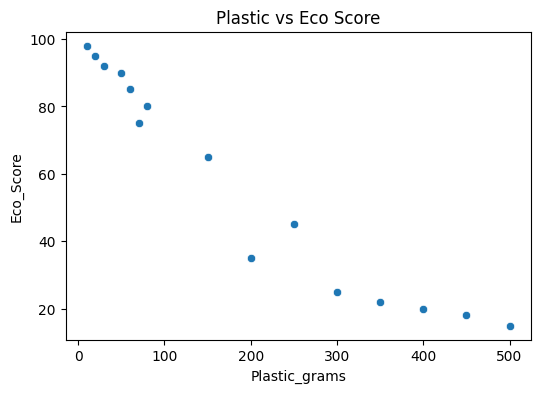

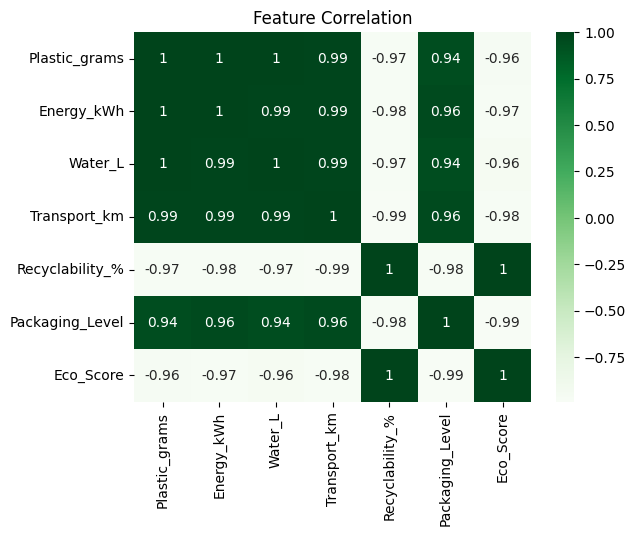

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Plastic_grams', y='Eco_Score', data=df)
plt.title("Plastic vs Eco Score")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.title("Feature Correlation")
plt.show()


In [ ]:
X = df.drop('Eco_Score', axis=1)
y = df['Eco_Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test,pred))
print("MAE:", mean_absolute_error(y_test,pred))


R2 Score: 0.866795681063123
MAE: 5.626666666666665


In [ ]:
plastic = float(input("Plastic used (grams): "))
energy = float(input("Energy used (kWh): "))
water = float(input("Water usage (litres): "))
transport = float(input("Transport distance (km): "))
recycle = float(input("Recyclability %: "))
packaging = int(input("Packaging level (1-5): "))

input_data = np.array([[plastic,energy,water,transport,recycle,packaging]])
score = model.predict(input_data)

print("\n🌱 Predicted Eco Score:", round(score[0],2))

if score >= 75:
    print("✅ Highly Sustainable Product")
elif score >= 45:
    print("⚠️ Moderately Sustainable")
else:
    print("❌ Not Sustainable Product")
